# Exponential-Gaussian Hybrid

Although the simplest Gaussian model is symmetric, it is not true for most chromatographic profiles. Therefore, we need asymmetric models. EGH model, which was introduced by {cite:p}`LAN2001`, is the one we have chosen for its mathmatical simplisity and numerical stability as stated in the paper.

Its asymmetry parameter is `tau` and it reduces to the Gaussian when `tau` = 0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def plot_egh(x, A=1.0, mu=0.0, sigma=1.0, tau=1.0):
    from molass.SEC.Models.Simple import egh
    y = egh(x, A, mu, sigma, tau)

    w = np.sum(y)
    mean = np.sum(x * y) / w
    variance = np.sum((x - mean) ** 2 * y) / w
    std = np.sqrt(variance)

    plt.plot(x, y)
    plt.axvline(mean, color='r', linestyle='--', label='Mean')
    plt.axvline(mean + std, color='g', linestyle='--', label='Std Dev')
    plt.axvline(mean - std, color='g', linestyle='--')
    plt.legend()
    plt.title('Exponential-Gaussian Hybrid Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.show()

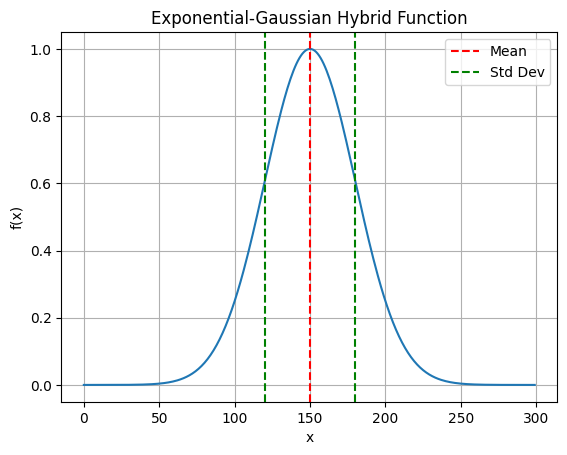

In [2]:
x = np.arange(300)
plot_egh(x, A=1.0, mu=150.0, sigma=30.0, tau=0)

In [3]:
def plot_egh_curves(x, params):
    from molass.SEC.Models.Simple import egh, egh_std
    for k, param in enumerate(params):
        A = param['A']
        mu = param['mu']
        sigma = param['sigma']
        tau = param['tau']
        y = egh(x, A, mu, sigma, tau)
        plt.plot(x, y, label=f"A={A}, mu={mu}, sigma={sigma}, tau={tau}")
        if k == 1:
            w = np.sum(y)
            mean = np.sum(x * y) / w
            variance = np.sum((x - mean) ** 2 * y) / w
            std = np.sqrt(variance)
            plt.axvline(mean, color='r', linestyle='--', label='Mean')
            plt.axvline(mean + std, color='g', linestyle='--', label='Std Dev')
            plt.axvline(mean - std, color='g', linestyle='--')
            print("std=", std)
            print("egh_std=", egh_std(sigma, tau)) # std and egh_std should be nearly equal
    plt.title('Exponential-Gaussian Hybrid Functions')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.legend()
    plt.show()

Observe the asymmetriy and peak width when tau ≠ 0 in the following examples.

Note that the peak is tailing when tau > 0, although it is fronting when tau < 0.

std= 33.84714025172843
egh_std= 34.80891242918417


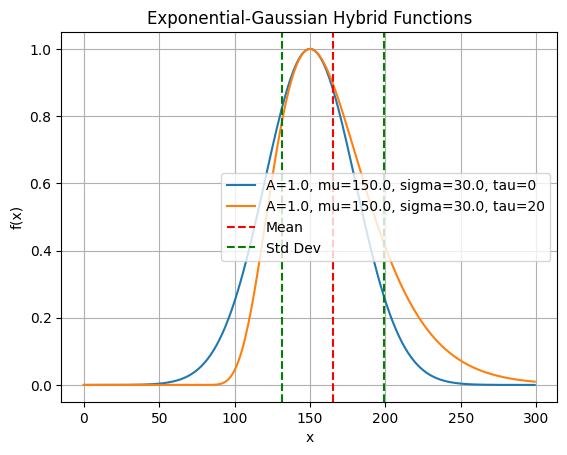

In [4]:
plot_egh_curves(x, [
    {'A': 1.0, 'mu': 150.0, 'sigma': 30.0, 'tau': 0},
    {'A': 1.0, 'mu': 150.0, 'sigma': 30.0, 'tau': 20},
])

std= 33.87692761099224
egh_std= 34.80891242918417


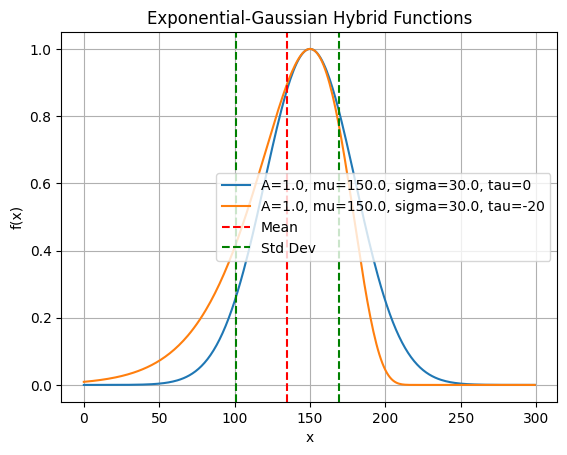

In [5]:
plot_egh_curves(x, [
    {'A': 1.0, 'mu': 150.0, 'sigma': 30.0, 'tau': 0},
    {'A': 1.0, 'mu': 150.0, 'sigma': 30.0, 'tau': -20},
])